In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from datetime import datetime
from tqdm import tqdm

In [6]:
ohlcv_cols = ['open', 'high', 'low', 'close', 'volume']
data15m= pd.read_parquet(r"C:\Users\USER\Documents\Tradingstuff\rawdatabinanceSOLUSDT-15m-data.parquet",columns=ohlcv_cols)

data = data15m.resample('1h').agg({'open':'first', 'high':'max', 'low':'min', 'close':'last', 'volume':'sum'})
data.head()

,open,high,low,close,volume
timestamp,,,,,
2023-01-01 00:00:00,9.968,10.016,9.923,9.979,2192047.0
2023-01-01 01:00:00,9.980,10.060,9.970,10.032,1386948.0
2023-01-01 02:00:00,10.031,10.074,9.981,10.006,1048577.0
2023-01-01 03:00:00,10.005,10.005,9.894,9.957,1629822.0
2023-01-01 04:00:00,9.957,9.978,9.810,9.837,1883235.0


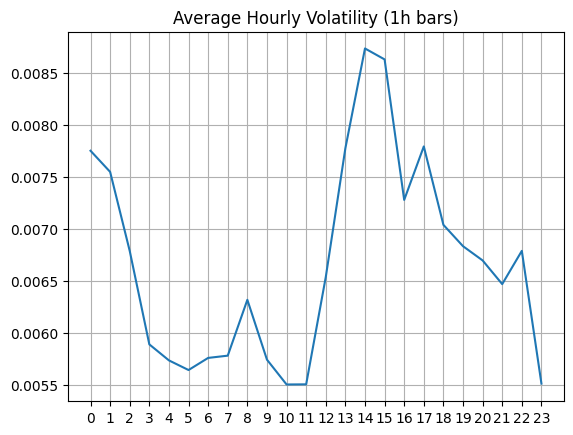

In [7]:
rets = data['close'].pct_change().dropna()
vol_arr = [np.mean(abs(ret)) for hour, ret in rets.groupby(rets.index.hour)]
plt.plot(vol_arr)
plt.xticks(range(24))
plt.grid()
plt.title("Average Hourly Volatility (1h bars)")
plt.show()


In [8]:
data1m = pd.read_parquet(r"C:\Users\USER\Documents\Binance_related\1mindata2022\ SOLUSDT-1m-data.parquet", columns=ohlcv_cols)
data1m.head()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\USER\\Documents\\Binance_related\\1mindata2022\\ SOLUSDT-1m-data.parquet'

In [ ]:
data1m['hour_minute'] = data1m.index.strftime('%H:%M')
rets1m = data1m['close'].pct_change().dropna()
data1m.dropna(inplace=True)


In [ ]:
data1m.head()   

,open,high,low,close,volume,hour_minute
timestamp,,,,,,
2022-01-01 00:00:00,3676.01,3685.95,3676.01,3684.04,1871.979,00:00
2022-01-01 00:01:00,3684.05,3692.29,3681.11,3690.61,1004.639,00:01
2022-01-01 00:02:00,3691.04,3692.94,3685.66,3692.00,1135.168,00:02
2022-01-01 00:03:00,3692.00,3693.93,3688.21,3689.25,592.950,00:03
2022-01-01 00:04:00,3689.24,3689.69,3686.55,3688.53,304.340,00:04


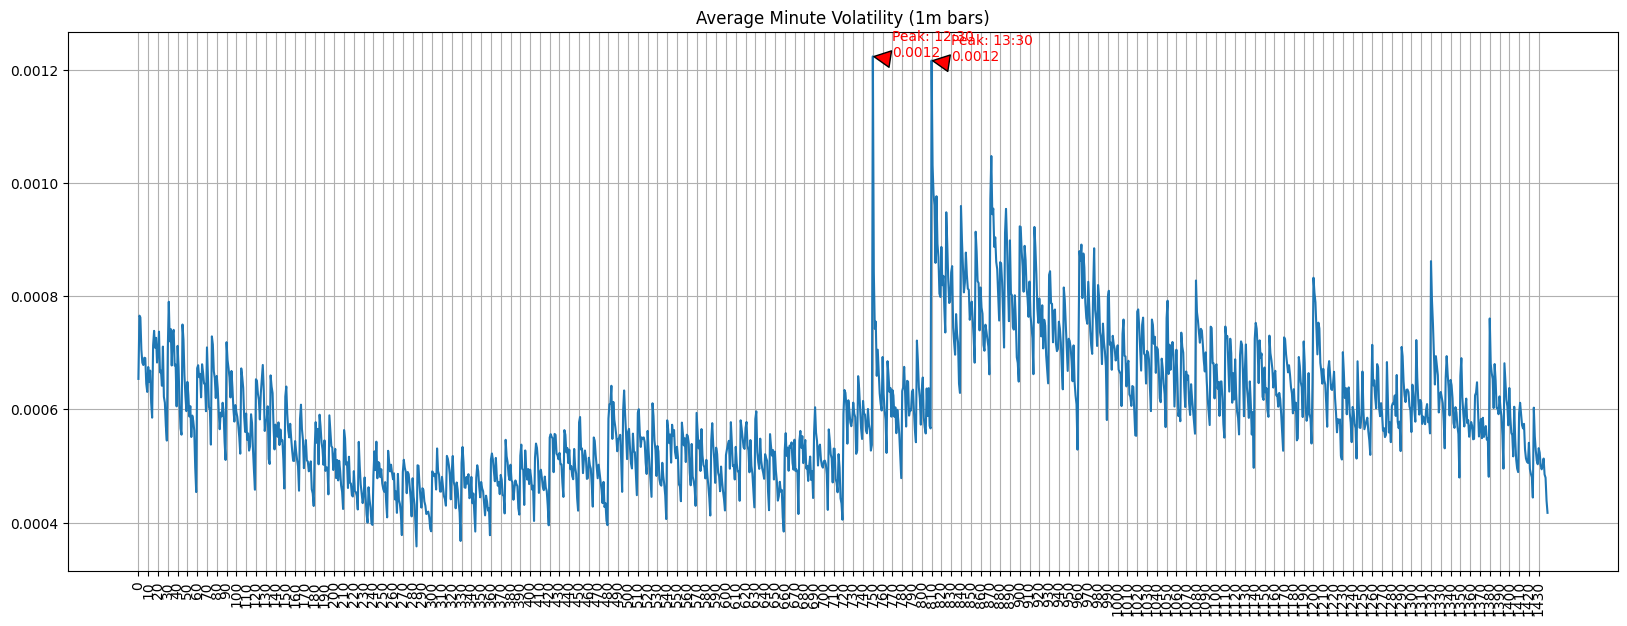

In [ ]:
vol_arr_1m = [np.mean(abs(ret)) for hm, ret in rets1m.groupby(data1m['hour_minute'])]
import numpy as np
hour_minute_list = sorted(data1m['hour_minute'].unique())
top2_idx = np.argsort(vol_arr_1m)[-2:][::-1]  # indices of top 2 peaks, descending
plt.figure(figsize=(20, 7))
plt.plot(vol_arr_1m)
plt.xticks(range(0, 1440, 10), rotation=90)
plt.grid()
plt.title("Average Minute Volatility (1m bars)")
for idx in top2_idx:
    hm = hour_minute_list[idx]
    plt.annotate(f'Peak: {hm}\n{vol_arr_1m[idx]:.4f}', xy=(idx, vol_arr_1m[idx]), xytext=(idx+20, vol_arr_1m[idx]),
                 arrowprops=dict(facecolor='red', shrink=0.05), color='red')
plt.show()

In [ ]:
data_1d = pd.read_parquet(r"C:\Users\USER\Documents\Binance_related\dailytickerdata2020\ SOLUSDT-1d-data.parquet", columns=ohlcv_cols)
data_1d['rets'] = data_1d['close'].pct_change().dropna()
data_1d.dropna(inplace=True)
data_1d.head()  


,open,high,low,close,volume,rets
timestamp,,,,,,
2020-01-02,130.63,130.75,126.25,127.11,523582.924,-0.026872
2020-01-03,127.11,135.07,125.78,134.29,951123.597,0.056487
2020-01-04,134.31,135.80,132.41,134.14,509778.108,-0.001117
2020-01-05,134.14,138.17,134.12,135.33,669677.687,0.008871
2020-01-06,135.32,144.38,134.82,144.04,1095147.166,0.064361


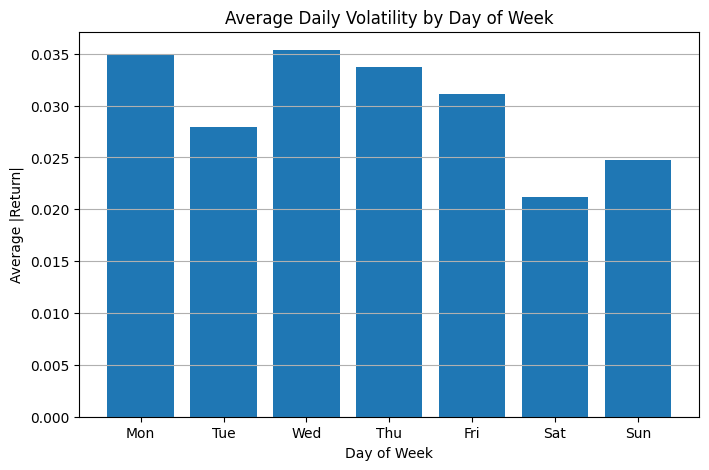

In [ ]:
vol_arr_1d = [np.mean(abs(ret)) for dayofweek, ret in data_1d['rets'].groupby(data_1d.index.dayofweek)]
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.figure(figsize=(8,5))
plt.bar(days, vol_arr_1d)
plt.title('Average Daily Volatility by Day of Week')
plt.ylabel('Average |Return|')
plt.xlabel('Day of Week')
plt.grid(axis='y')
plt.show()

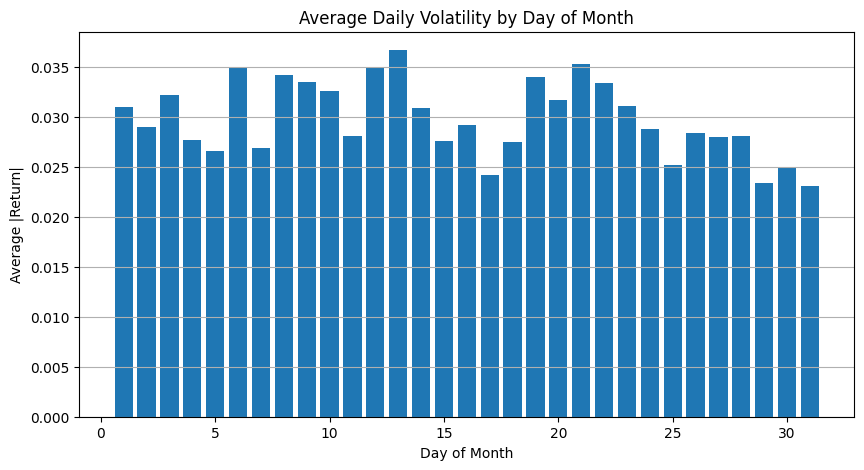

In [ ]:
vol_arr_dayofmonth = [np.mean(abs(ret)) for day, ret in data_1d['rets'].groupby(data_1d.index.day)]
days_of_month = list(range(1, 32))
plt.figure(figsize=(10,5))
plt.bar(days_of_month, vol_arr_dayofmonth)
plt.title('Average Daily Volatility by Day of Month')
plt.ylabel('Average |Return|')
plt.xlabel('Day of Month')
plt.grid(axis='y')
plt.show()

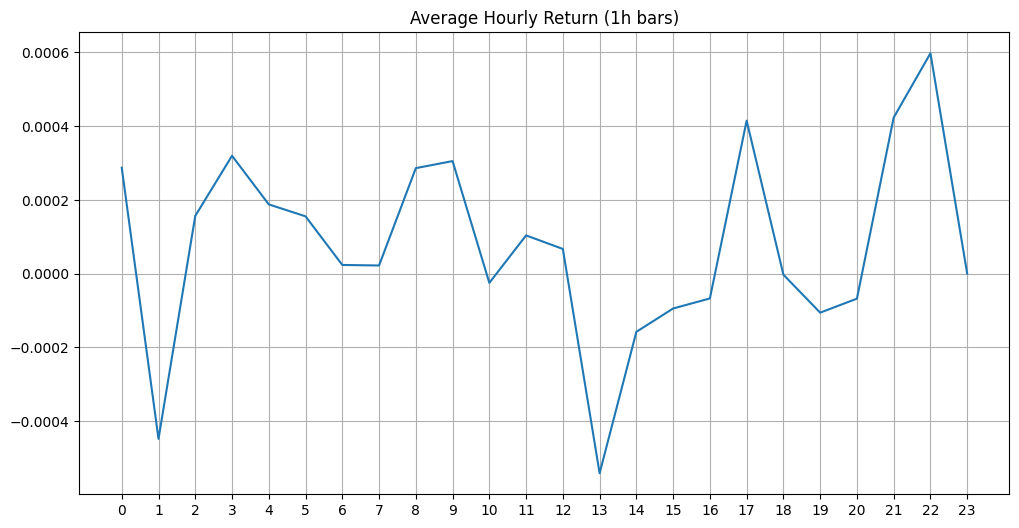

In [ ]:
ret_arr = [np.mean(ret) for hour, ret in rets.groupby(rets.index.hour)]
plt.figure(figsize=(12, 6))
plt.plot(ret_arr)
plt.xticks(range(24))
plt.grid()
plt.title("Average Hourly Return (1h bars)")
plt.show()


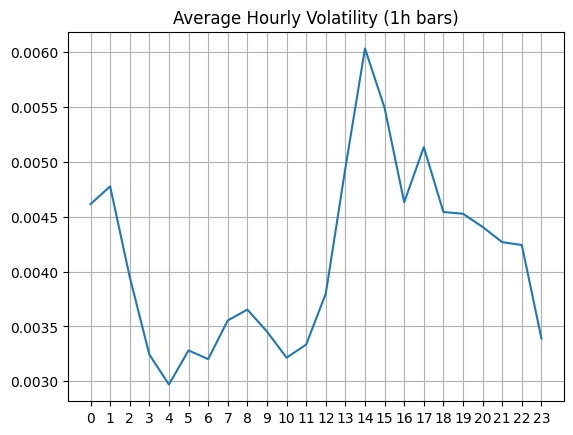

In [ ]:
plt.plot(vol_arr)
plt.xticks(range(24))
plt.grid()
plt.title("Average Hourly Volatility (1h bars)")
plt.show()

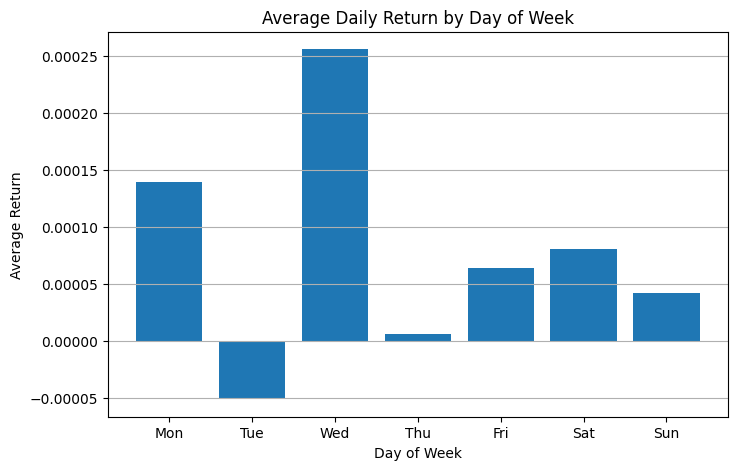

In [ ]:
ret_arr_dayofweek = [np.mean(ret) for dayofweek, ret in rets.groupby(rets.index.dayofweek)]
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.figure(figsize=(8,5))   
plt.bar(days, ret_arr_dayofweek)
plt.title('Average Daily Return by Day of Week')    
plt.ylabel('Average Return')
plt.xlabel('Day of Week')
plt.grid(axis='y')
plt.show()